# Phone addiction

## import and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [2]:
addict = pd.read_csv('/content/Students Social Media Addiction.csv')
addict

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


Dataset memiliki 13 kolom dan 705 baris

## EDA

In [3]:
addict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
addict.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


- Dataset berisi 705
- Kolom `Avg_Daily_Usage_Hours` adalah target utama dan memiliki nilai antara 1.5 hingga 8.5.

### Penanganan Outliers

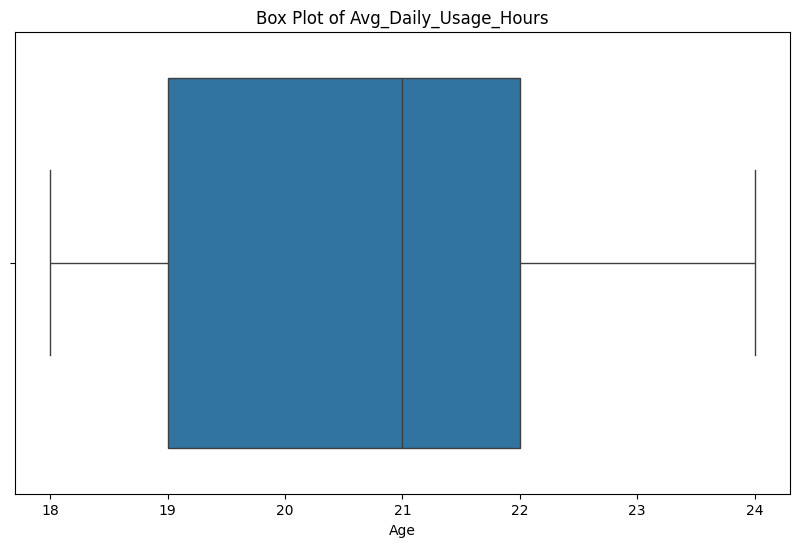

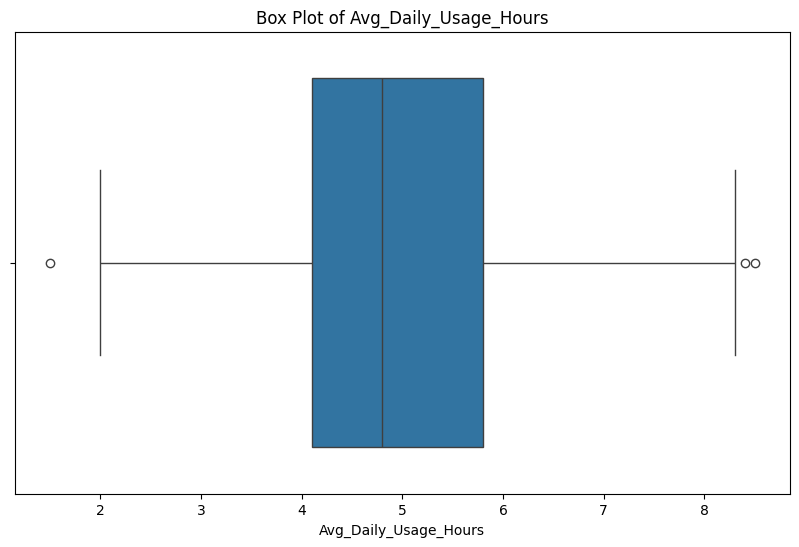

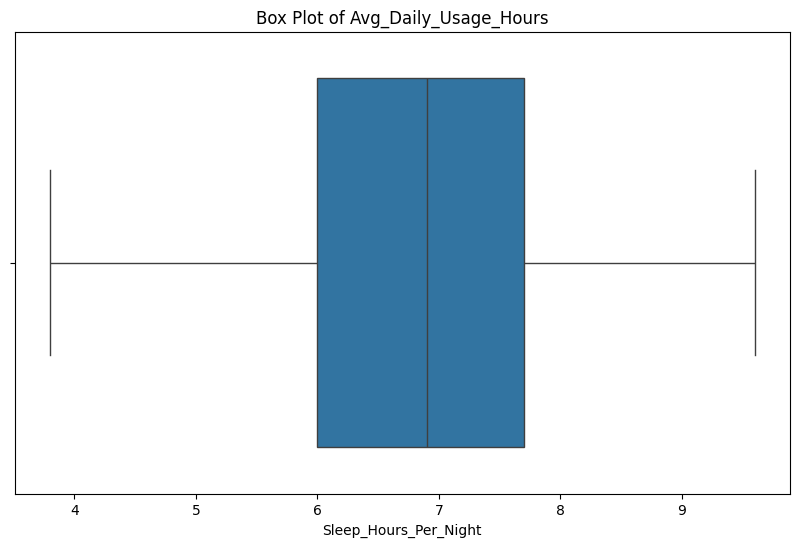

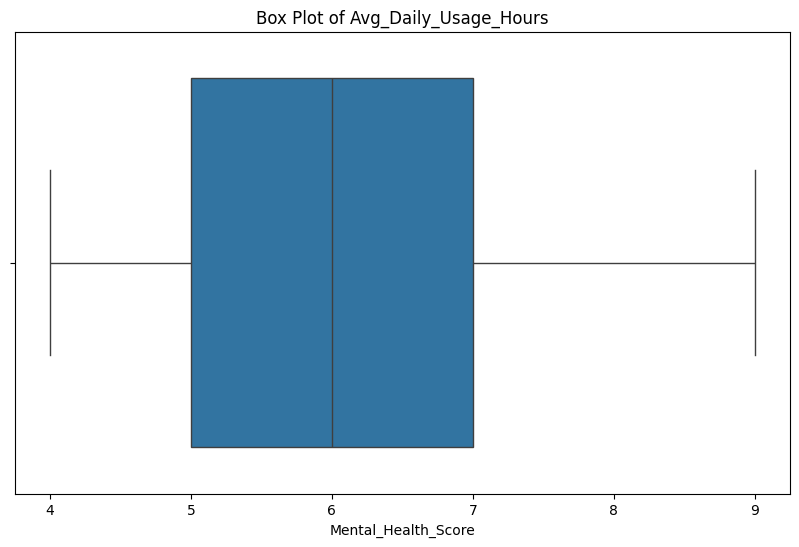

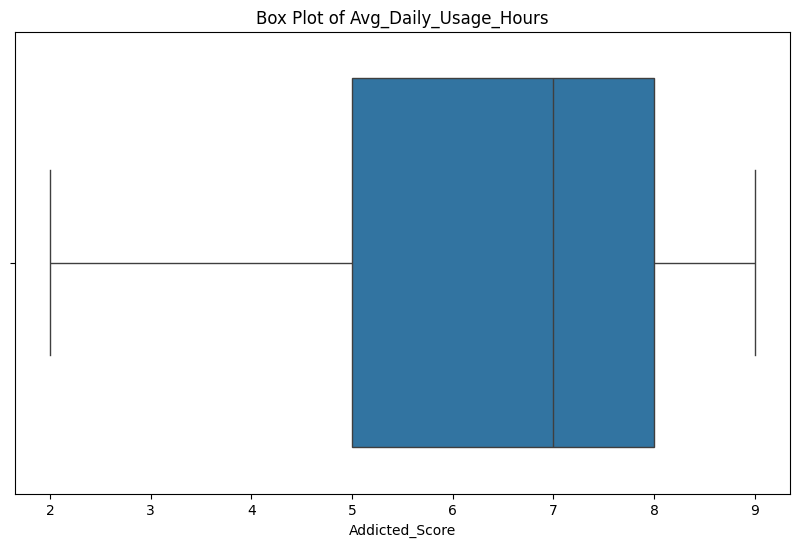

In [5]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=addict[feature])
    plt.title(f'Box Plot of Avg_Daily_Usage_Hours')
    plt.xlabel(feature)
    plt.show()


In [6]:
filtered_data = addict[(addict["Avg_Daily_Usage_Hours"] == 1.5) | (addict["Avg_Daily_Usage_Hours"] == 8.5)]
filtered_data

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
496,497,19,Female,Undergraduate,USA,8.5,Instagram,Yes,3.8,5,In Relationship,4,9


Karna data di atas tidak representatif atau mewakili sebagian data, maka kedua data tersebut bisa dianggap kategori khusus dan perlu di hapus.

In [7]:
numeric_cols = addict.select_dtypes(include='number').columns

Q1 = addict[numeric_cols].quantile(0.25)
Q3 = addict[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((addict[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (addict[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

addict = addict[filter_outliers]

addict.shape

(702, 13)

jumlah baris data yang dihapus yakni 3 total data sebelum di hapus 705 ==> 702

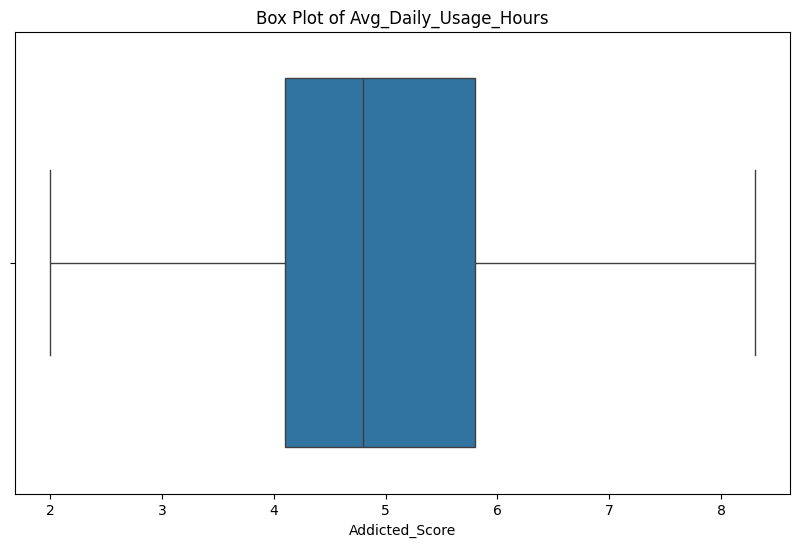

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=addict['Avg_Daily_Usage_Hours'])
plt.title(f'Box Plot of Avg_Daily_Usage_Hours')
plt.xlabel(feature)
plt.show()

data sudah bersih

### Univariate EDA

In [9]:
addict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    702 non-null    int64  
 1   Age                           702 non-null    int64  
 2   Gender                        702 non-null    object 
 3   Academic_Level                702 non-null    object 
 4   Country                       702 non-null    object 
 5   Avg_Daily_Usage_Hours         702 non-null    float64
 6   Most_Used_Platform            702 non-null    object 
 7   Affects_Academic_Performance  702 non-null    object 
 8   Sleep_Hours_Per_Night         702 non-null    float64
 9   Mental_Health_Score           702 non-null    int64  
 10  Relationship_Status           702 non-null    object 
 11  Conflicts_Over_Social_Media   702 non-null    int64  
 12  Addicted_Score                702 non-null    int64  
dtypes: float64

In [10]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status' ]

#### cat_feat

        jumlah sampel   persentase
Gender                            
Female             351        50.0
Male               351        50.0


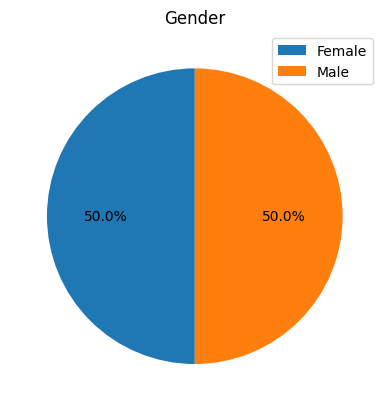

In [11]:
feature = categorical_features[0]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='pie', title=feature, startangle=90, autopct='%1.1f%%', labels=None);
plt.ylabel("")
plt.legend(loc='upper right', labels=count.index)

Jumlah sample gender di dalam dataset seimbang

                jumlah sampel   persentase
Academic_Level                            
Undergraduate              351        50.0
Graduate                   324        46.2
High School                 27         3.8


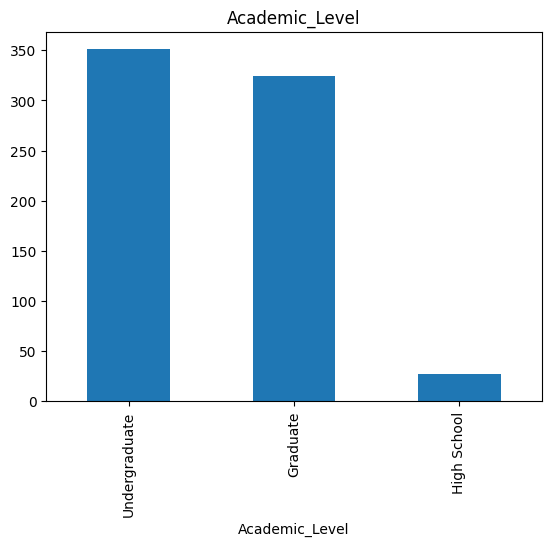

In [12]:
feature = categorical_features[1]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel ':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Sample didominasi oleh Mahasiswa Aktif dengan total 351 diikuti oleh Graduate yang berjumlah 324 dan High School student berjumlah 27

             jumlah sampel  persentase
Country                               
India                   53         7.5
USA                     38         5.4
Canada                  34         4.8
Mexico                  27         3.8
Spain                   27         3.8
...                    ...         ...
Jordan                   1         0.1
Oman                     1         0.1
Afghanistan              1         0.1
Syria                    1         0.1
Bhutan                   1         0.1

[110 rows x 2 columns]


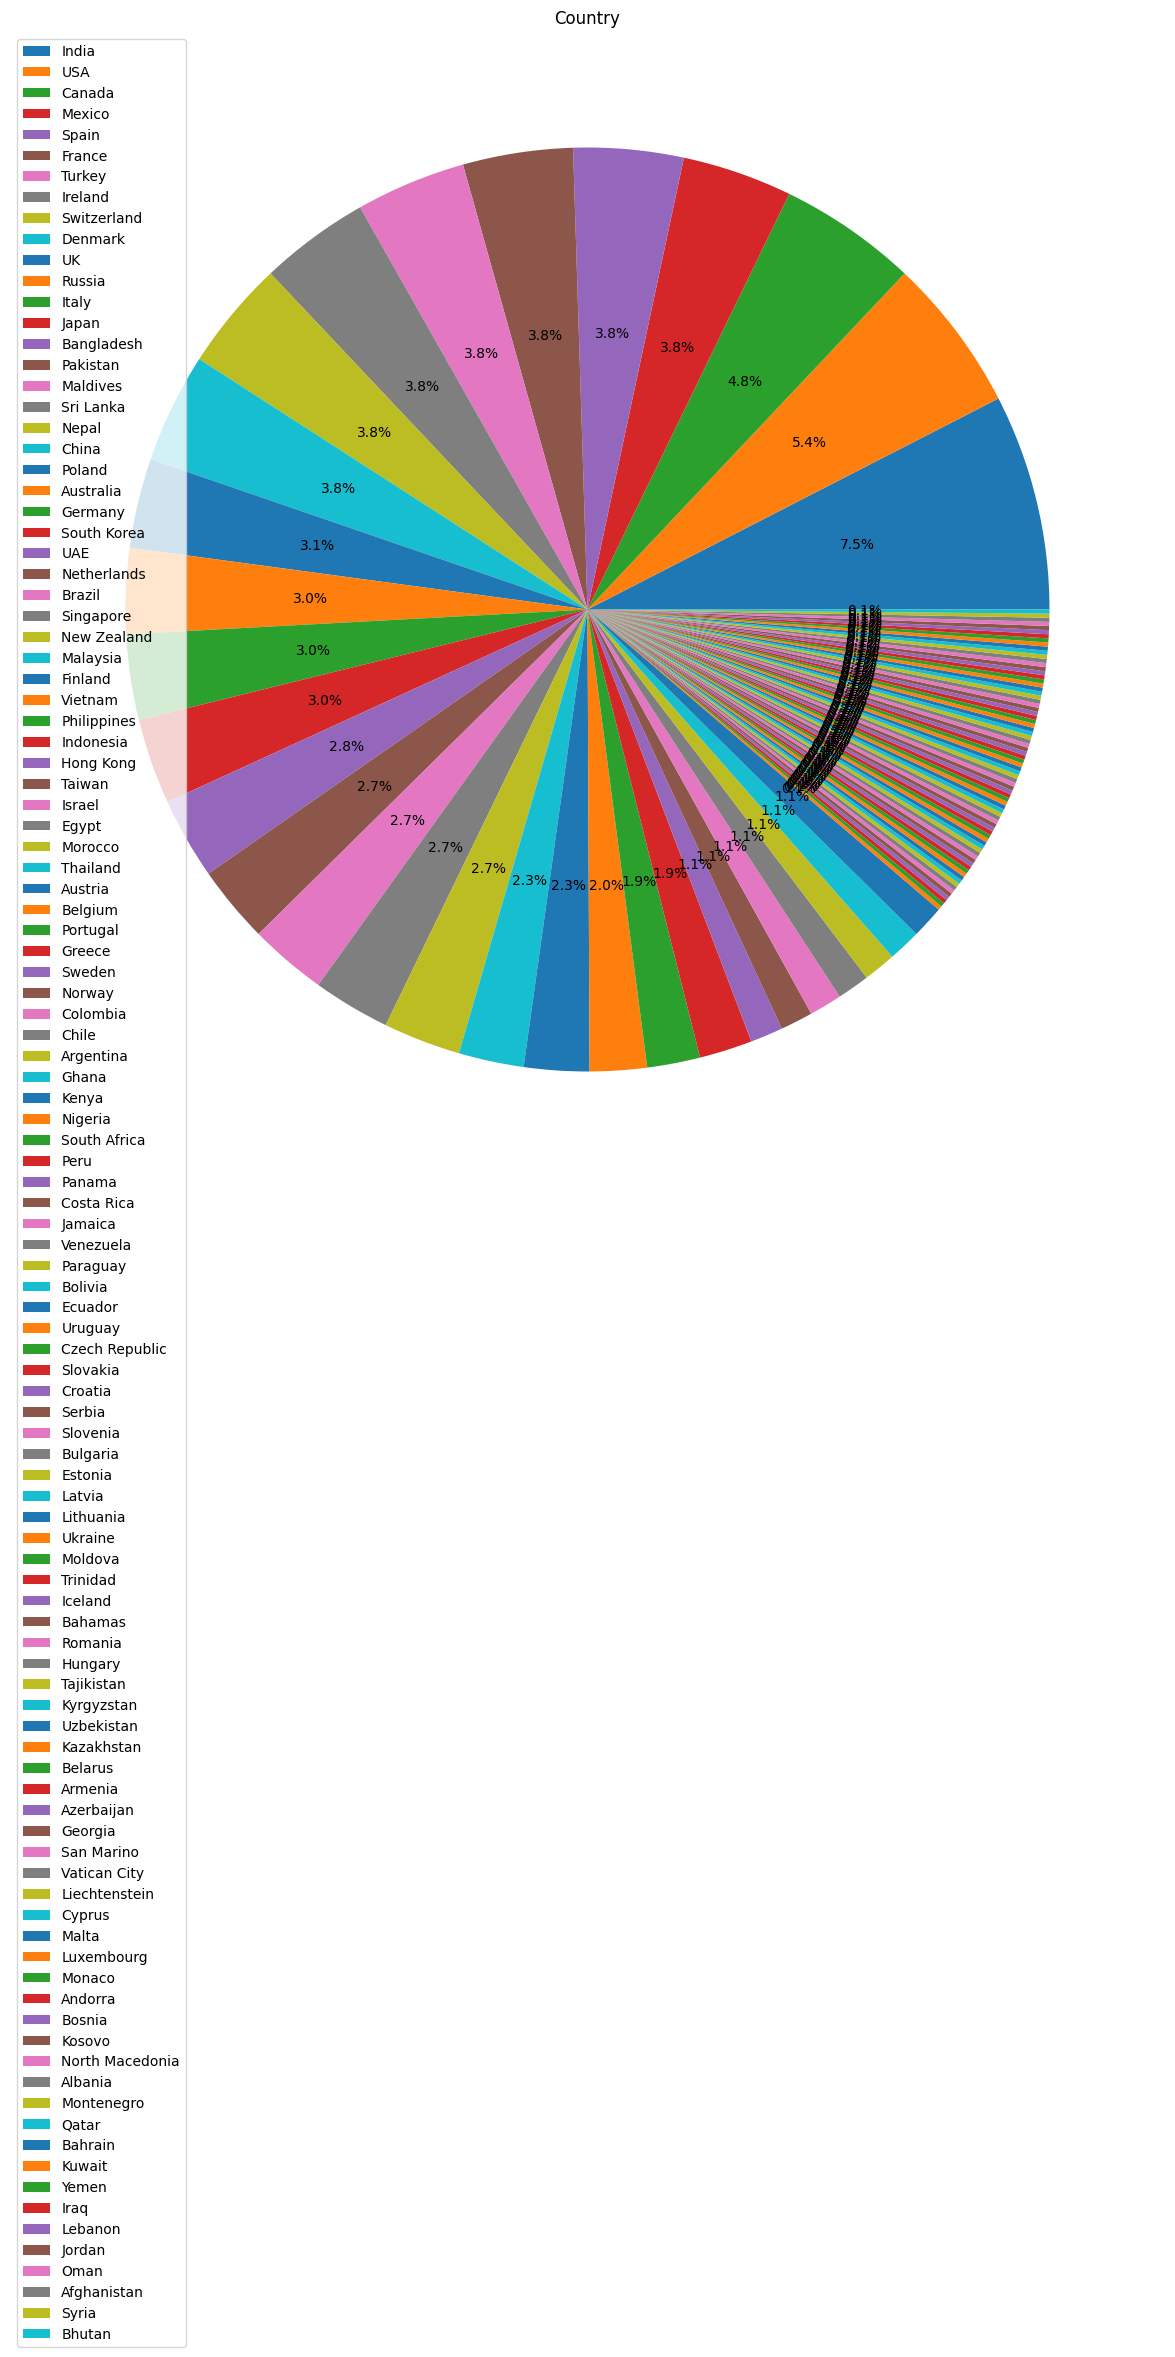

In [13]:
feature = categorical_features[2]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
plt.figure(figsize=(27, 15))
count.plot(kind='pie', title=feature, autopct='%1.1f%%', labels=None);
plt.ylabel("")
plt.legend(loc='best', labels=count.index)


Data menunjukkan bahwa sebagian besar negara memiliki jumlah Sample atau kejadian yang sangat rendah, sementara beberapa negara memiliki jumlah yang jauh lebih tinggi.

                    jumlah sampel  persentase
Most_Used_Platform                           
Instagram                     248        35.3
TikTok                        153        21.8
Facebook                      123        17.5
WhatsApp                       54         7.7
Twitter                        30         4.3
LinkedIn                       20         2.8
WeChat                         15         2.1
Snapchat                       13         1.9
VKontakte                      12         1.7
LINE                           12         1.7
KakaoTalk                      12         1.7
YouTube                        10         1.4


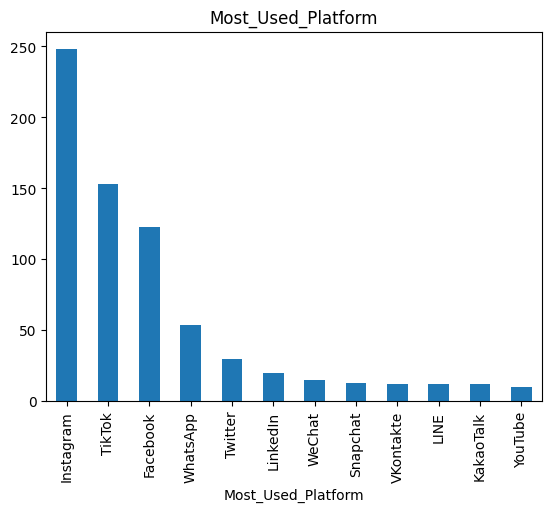

In [14]:
feature = categorical_features[3]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan diagram tersebut, Instagram adalah aplikasi yang paling populer di kalangan pengguna (dengan jumlah pengguna terbanyak, bukan durasi penggunaan terlama).

                              jumlah sampel  persentase
Affects_Academic_Performance                           
Yes                                     451        64.2
No                                      251        35.8


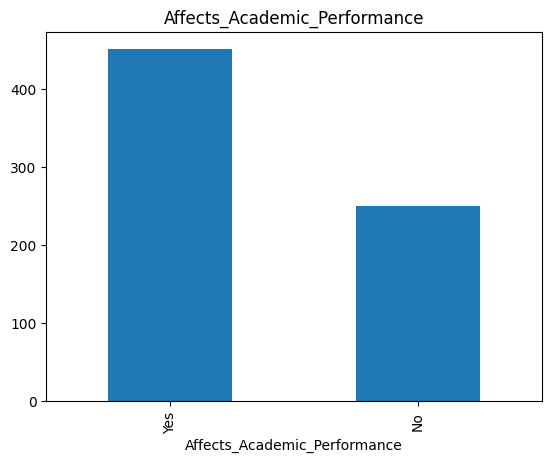

In [15]:
feature = categorical_features[4]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Dari total 451 siswa/mahasiswa dalam dataset, penggunaan ponsel memiliki pengaruh yang signifikan terhadap Kinerja Akademik (Academic Performance).

                     jumlah sampel  persentase
Relationship_Status                           
Single                         383        54.6
In Relationship                287        40.9
Complicated                     32         4.6


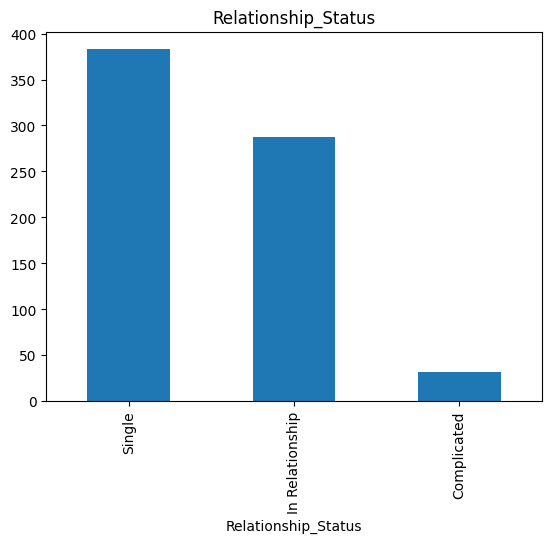

In [16]:
feature = categorical_features[5]
count = addict[feature].value_counts()
percent = 100*addict[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Status hubungan juga berperan dalam durasi penggunaan ponsel yang lama, terutama untuk aktivitas seperti berkirim pesan, panggilan video, dan telepon. Data menunjukkan distribusi status hubungan dalam sampel adalah: 54.6% single, 40.9% sedang menjalin hubungan (in relationship), dan 4.6% memiliki status yang rumit (complicated).

#### numerical_feat

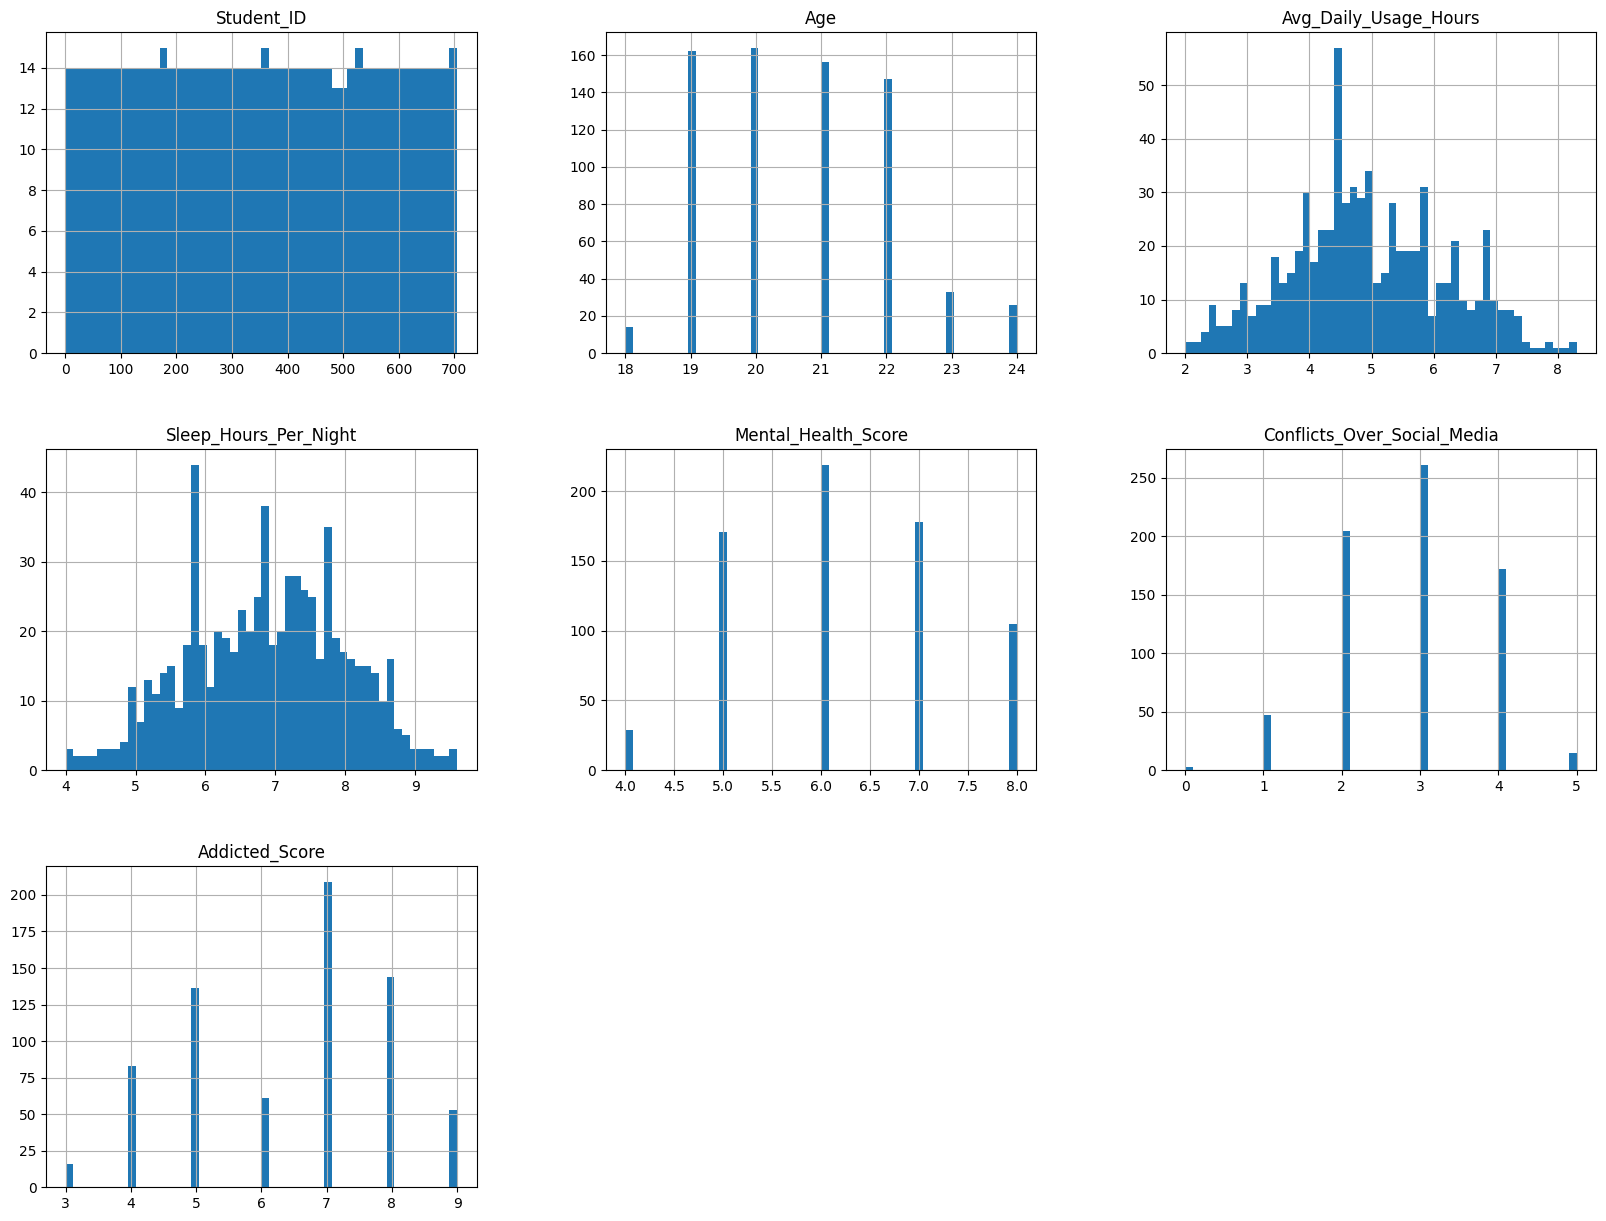

In [17]:
addict.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram `Addicted_Score`, kita bisa memperoleh beberapa informasi, antara lain:
- Distribusi menunjukkan puncak pada skor 7, mengindikasikan bahwa skor kecanduan yang paling umum di antara siswa adalah 7.
- Skor 5 dan 8 juga memiliki frekuensi yang cukup tinggi, menunjukkan sejumlah besar siswa dengan tingkat kecanduan sedang hingga tinggi.
- Rentang skor kecanduan dalam dataset ini adalah dari 3 hingga 9.
- Frekuensi cenderung lebih rendah pada skor ekstrem (3 dan 9), menunjukkan bahwa hanya sebagian kecil siswa yang memiliki tingkat kecanduan yang sangat rendah atau sangat tinggi berdasarkan skala ini.
- Distribusi tidak terlalu miring; terdapat beberapa puncak yang menunjukkan pengelompokan skor kecanduan pada nilai-nilai tertentu.


### Multivariate EDA

#### cat_feat

<ipython-input-18-8d42ae257815>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Addicted_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=addict, palette="Set3")
<ipython-input-18-8d42ae257815>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Addicted_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=addict, palette="Set3")
<ipython-input-18-8d42ae257815>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Addicted_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=addict, pa

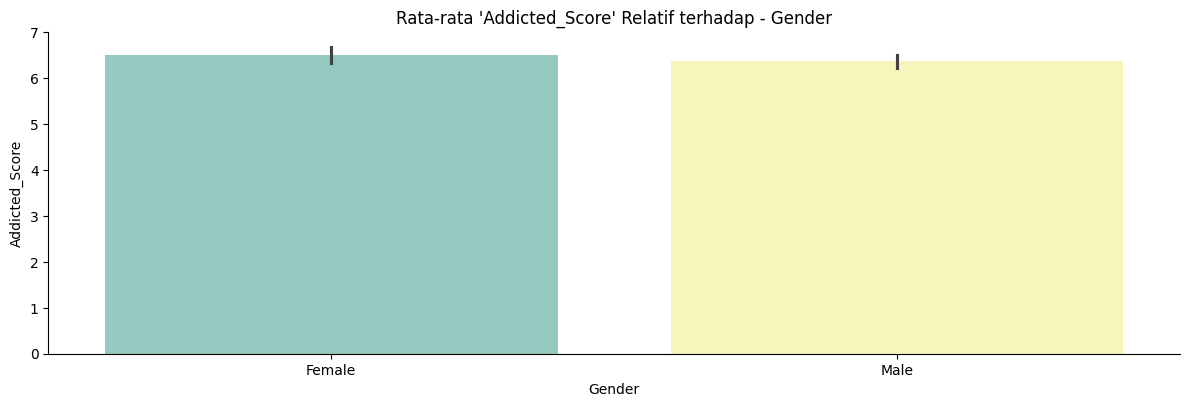

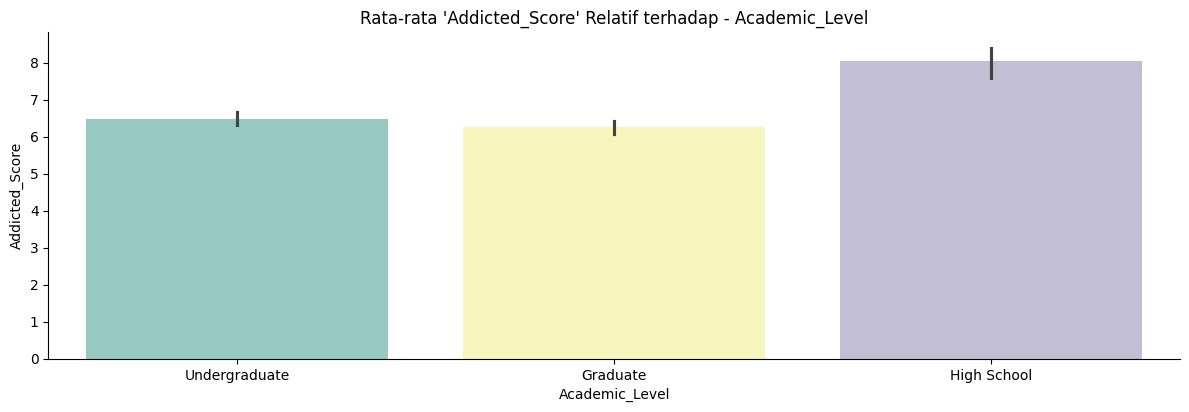

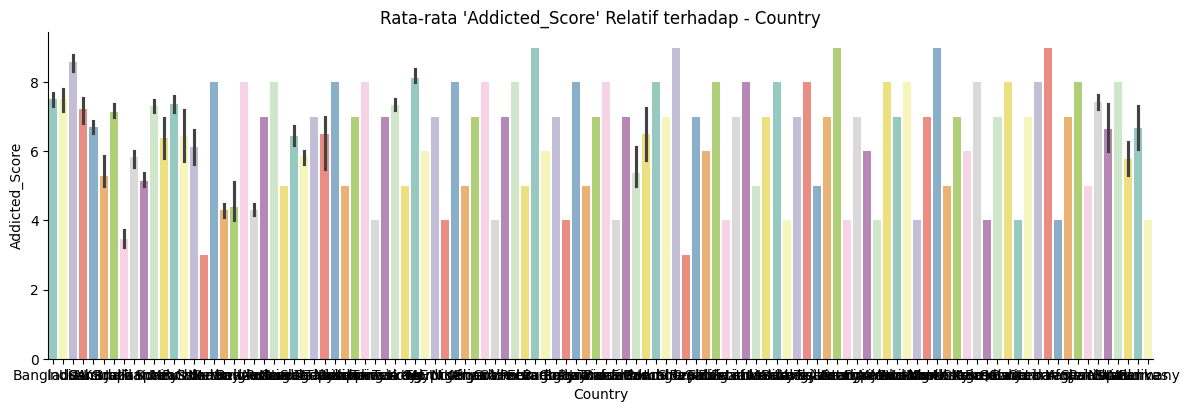

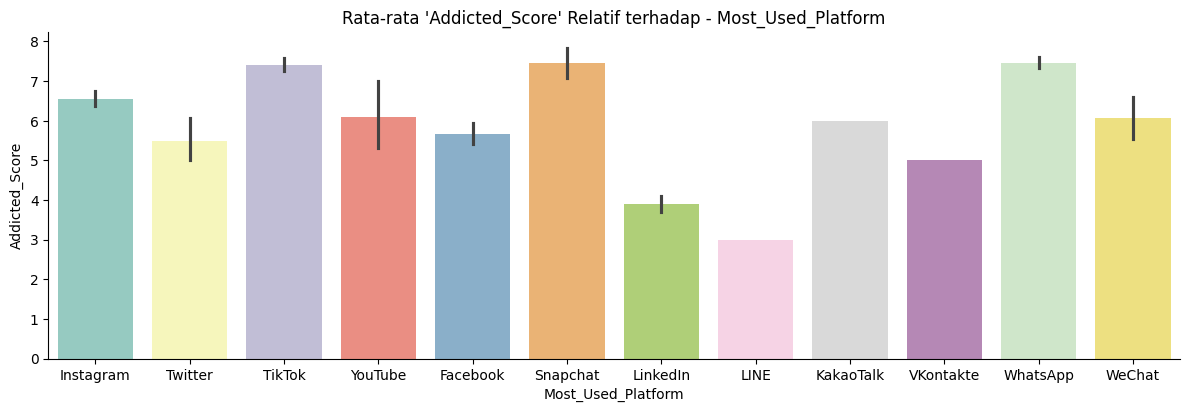

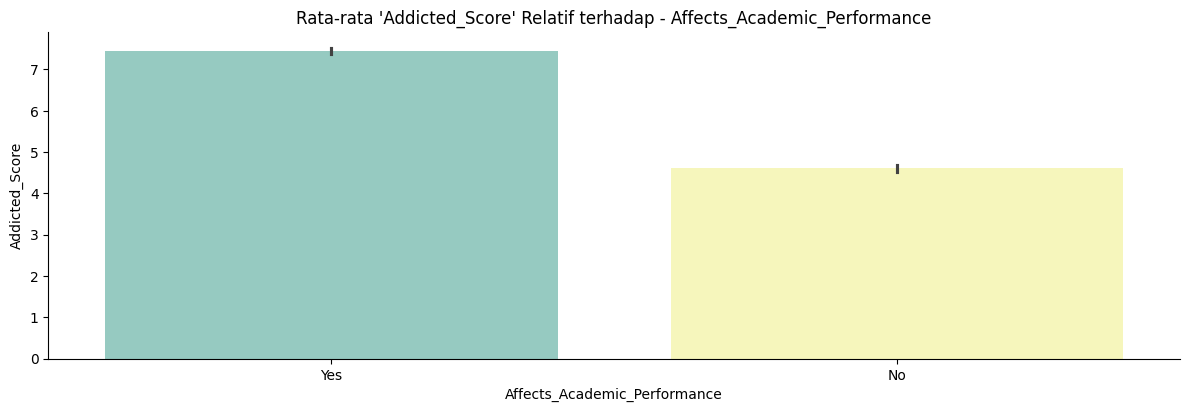

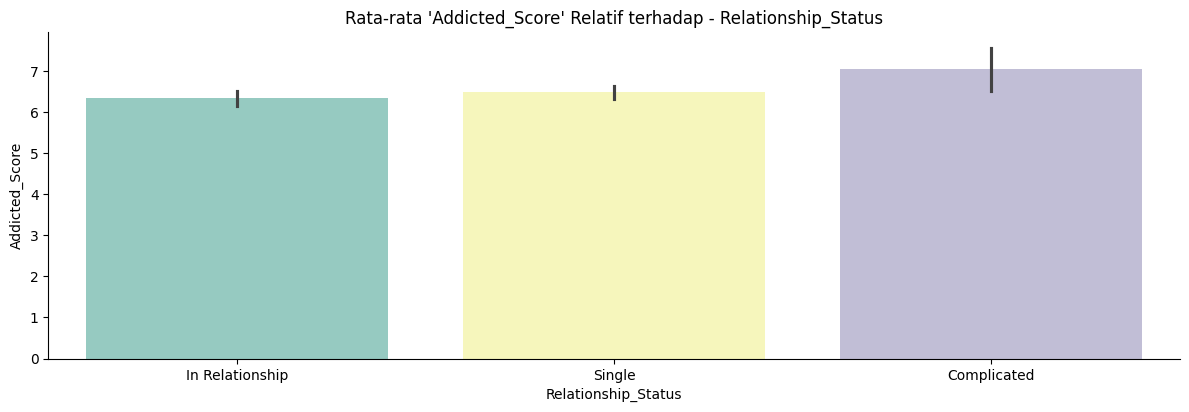

In [18]:
cat_features = addict.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Addicted_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=addict, palette="Set3")
  plt.title("Rata-rata 'Addicted_Score' Relatif terhadap - {}".format(col))

- Rata-rata skor kecanduan antara siswa berjenis kelamin Perempuan (Female) dan Laki-laki (Male) terlihat cukup mirip. Meskipun terdapat sedikit perbedaan pada nilai rata-rata dan error bar, perbedaan ini tidak tampak signifikan secara visual. Ini mengindikasikan bahwa gender mungkin bukan pembeda utama dalam tingkat kecanduan media sosial.
- Terdapat variasi rata-rata skor kecanduan di antara berbagai tingkat pendidikan. Siswa dengan tingkat pendidikan Sekolah Menengah Atas (High School) menunjukkan rata-rata skor kecanduan yang paling tinggi, diikuti oleh mahasiswa (Undergraduate). Siswa lulusan (Graduate) memiliki rata-rata skor kecanduan yang tampak paling rendah. Tingkat pendidikan sepertinya memiliki pengaruh terhadap tingkat kecanduan media sosial.
- Rata-rata skor kecanduan bervariasi secara signifikan di antara platform media sosial yang paling sering digunakan. Snapchat dan TikTok terlihat memiliki rata-rata skor kecanduan yang lebih tinggi dibandingkan platform lain. LINE menunjukkan rata-rata skor kecanduan yang paling rendah. Platform yang paling sering digunakan tampaknya sangat berkaitan dengan tingkat kecanduan media sosial.
- Siswa yang merasa bahwa penggunaan media sosial mempengaruhi (Yes) kinerja akademik mereka cenderung memiliki rata-rata skor kecanduan yang lebih tinggi dibandingkan dengan mereka yang merasa tidak (No) terpengaruh. Ini mengindikasikan adanya hubungan antara persepsi dampak negatif pada akademik dan tingkat kecanduan media sosial.
- Terdapat perbedaan dalam rata-rata skor kecanduan di antara status hubungan yang berbeda (In Relationship, Single, Complicated). Siswa dengan status Complicated dan Single menunjukkan rata-rata skor kecanduan yang sedikit lebih tinggi dibandingkan dengan mereka yang In Relationship. Status hubungan mungkin memiliki pengaruh terhadap tingkat kecanduan media sosial.

#### numerical_feat

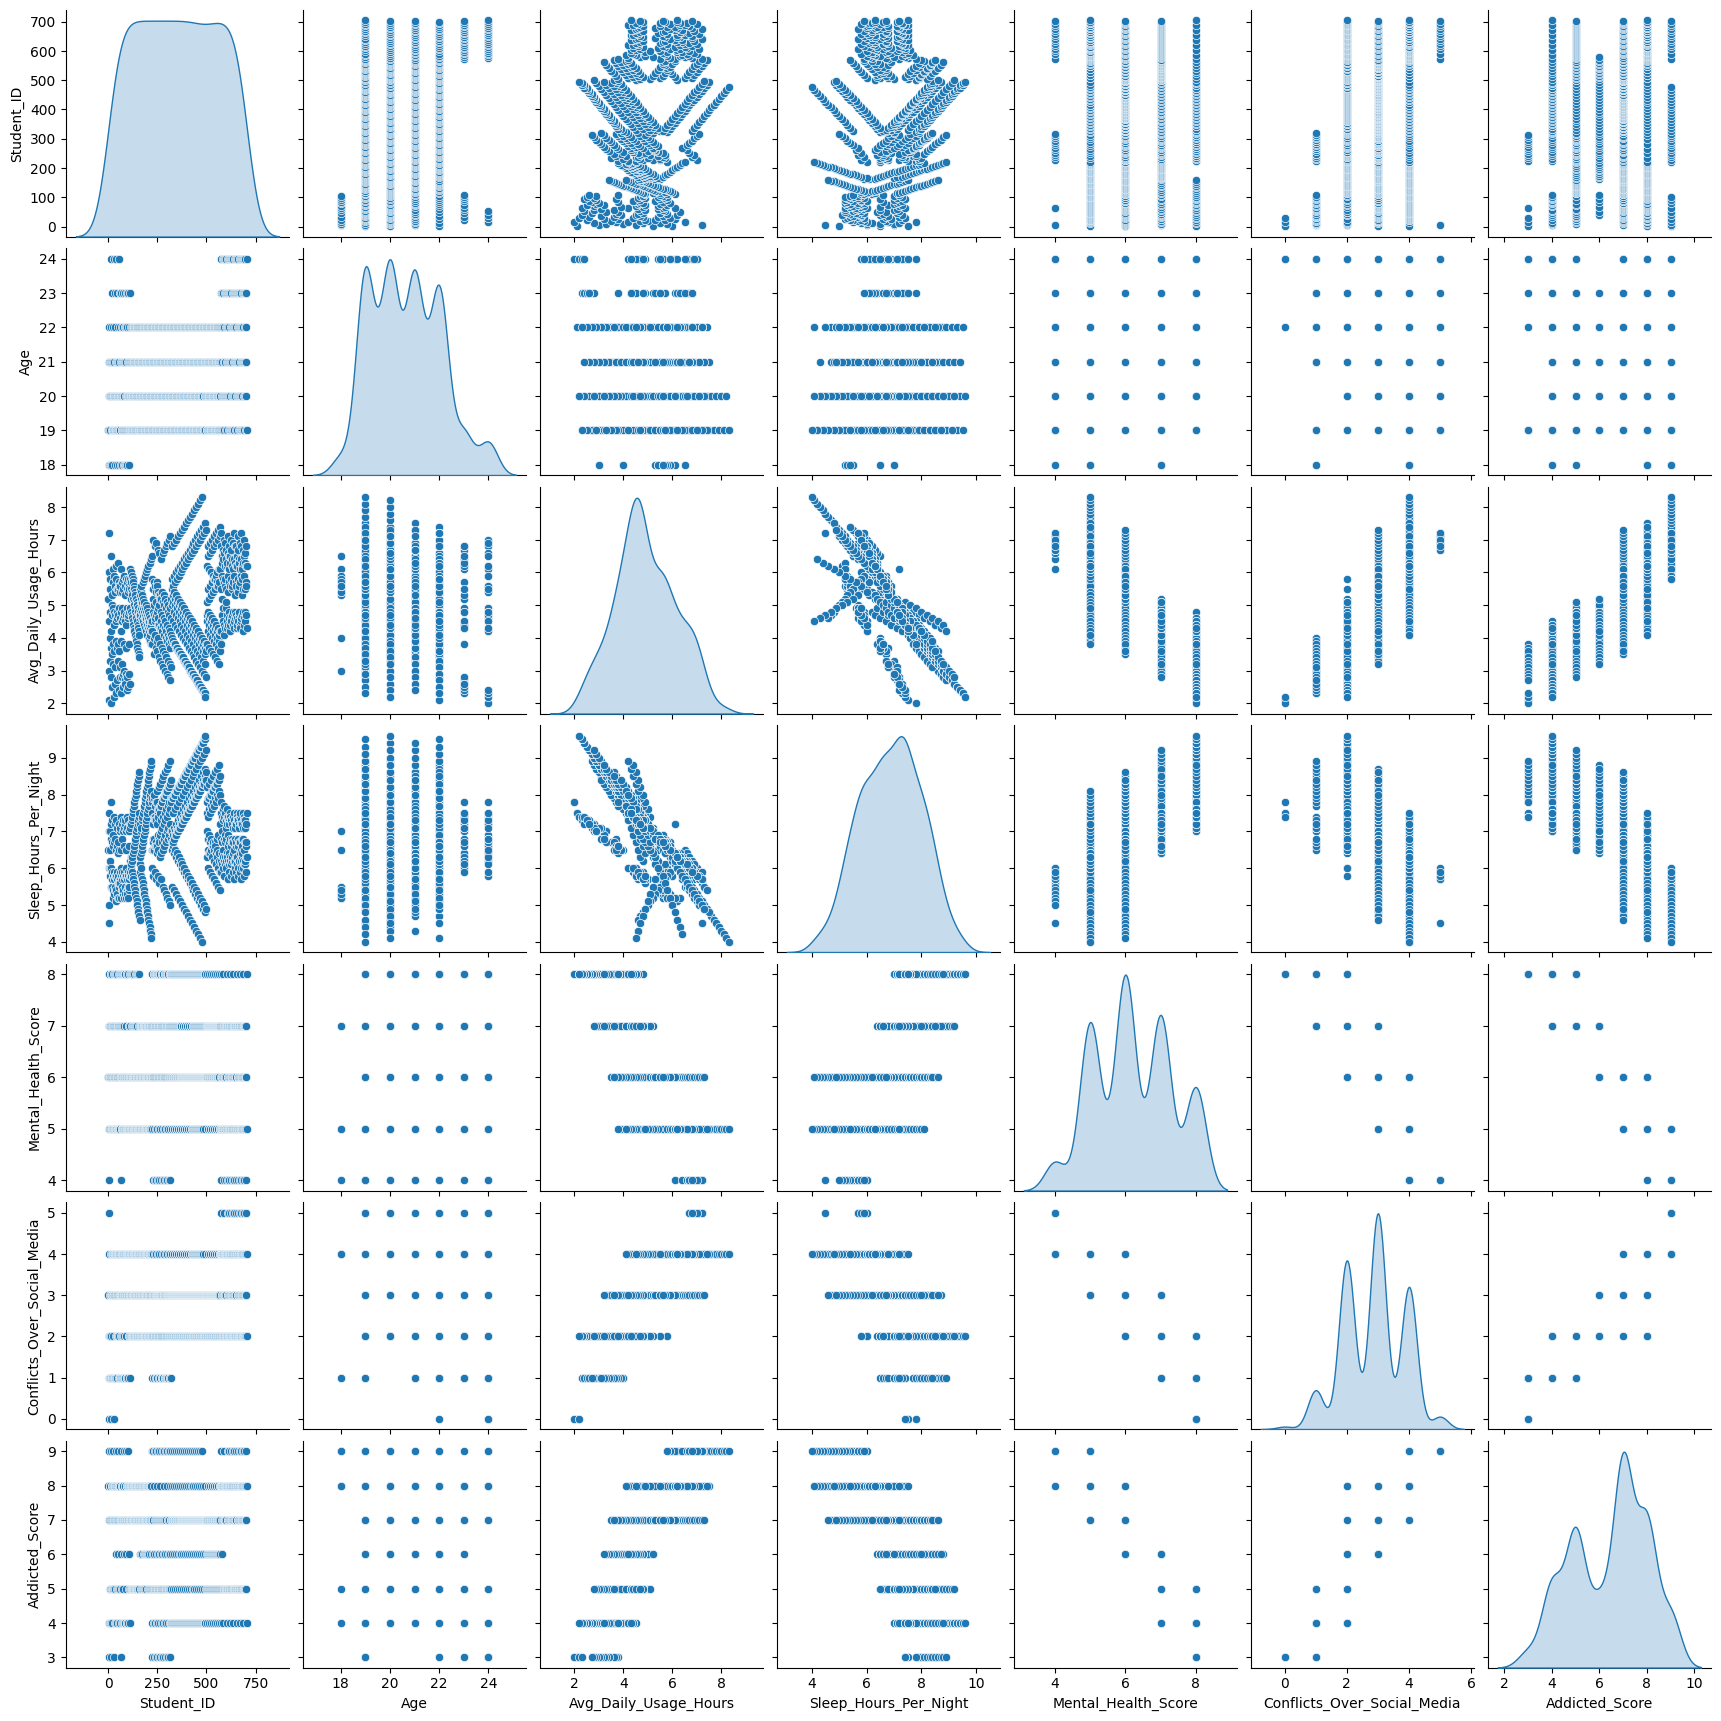

In [19]:
sns.pairplot(addict, diag_kind = 'kde')

Berdasarkan visualisasi pairplot, teridentifikasi beberapa potensi hubungan antar variabel. Terdapat indikasi korelasi positif antara rata-rata jam penggunaan media sosial harian (Avg_Daily_Usage_Hours) dengan skor kecanduan (Addicted_Score), menyiratkan bahwa semakin lama waktu yang dihabiskan di media sosial, semakin tinggi pula kemungkinan skor kecanduannya. Sebaliknya, jam tidur per malam (Sleep_Hours_Per_Night) cenderung berkorelasi negatif dengan durasi penggunaan media sosial dan skor kecanduan, di mana penggunaan yang lebih tinggi diasosiasikan dengan waktu tidur yang lebih sedikit. Skor kesehatan mental (Mental_Health_Score) juga menunjukkan kemungkinan hubungan negatif dengan intensitas penggunaan media sosial dan skor kecanduan, mengisyaratkan bahwa kesehatan mental yang kurang baik mungkin terkait dengan penggunaan media sosial yang lebih sering. Sementara itu, usia (Age) dan ID siswa (Student_ID) tidak menunjukkan pola korelasi linear yang jelas dengan variabel-variabel lainnya. Untuk mengukur kekuatan korelasi ini secara lebih tepat, analisis statistik kuantitatif seperti perhitungan koefisien korelasi diperlukan.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

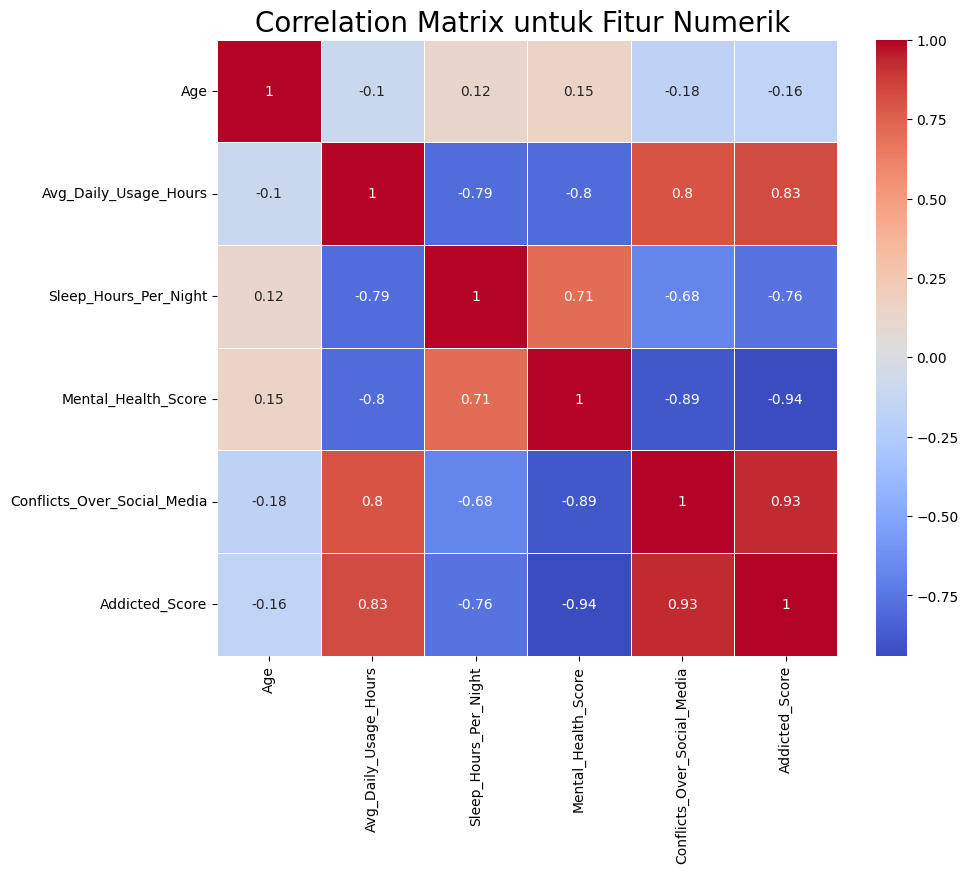

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = addict[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

- Avg_Daily_Usage_Hours memiliki korelasi positif yang sangat kuat dengan Conflicts_Over_Social_Media (0.8) dan Addicted_Score (0.83). Ini menunjukkan bahwa semakin tinggi rata-rata jam penggunaan media sosial harian, semakin besar kemungkinan terjadinya konflik akibat media sosial dan semakin tinggi pula skor kecanduannya.
- Sleep_Hours_Per_Night memiliki korelasi negatif yang kuat dengan Avg_Daily_Usage_Hours (-0.79), Mental_Health_Score (-0.8), Conflicts_Over_Social_Media (-0.68), dan Addicted_Score (-0.76). Ini mengindikasikan bahwa semakin sedikit jam tidur per malam, cenderung semakin tinggi penggunaan media sosial, semakin rendah skor kesehatan mental, semakin sering terjadi konflik akibat media sosial, dan semakin tinggi skor kecanduannya.
- Mental_Health_Score memiliki korelasi negatif yang kuat dengan Avg_Daily_Usage_Hours (-0.8), Sleep_Hours_Per_Night (0.71 - korelasi positif, kebalikannya dari poin sebelumnya), Conflicts_Over_Social_Media (-0.89), dan Addicted_Score (-0.94). Ini menunjukkan bahwa skor kesehatan mental yang lebih rendah sangat terkait dengan penggunaan media sosial yang lebih tinggi, jam tidur yang lebih sedikit, lebih seringnya konflik akibat media sosial, dan skor kecanduan yang lebih tinggi.
- Conflicts_Over_Social_Media memiliki korelasi positif yang sangat kuat dengan Avg_Daily_Usage_Hours (0.8) dan Addicted_Score (0.93). Ini menegaskan bahwa semakin sering terjadi konflik akibat media sosial, semakin tinggi pula penggunaan media sosial dan skor kecanduannya.
- Addicted_Score memiliki korelasi positif yang sangat kuat dengan Avg_Daily_Usage_Hours (0.83) dan Conflicts_Over_Social_Media (0.93). Ini menunjukkan bahwa skor kecanduan yang tinggi sangat erat kaitannya dengan durasi penggunaan media sosial yang lama dan seringnya konflik terkait media sosial.
- Age menunjukkan korelasi yang relatif lemah dengan semua fitur lainnya, dengan nilai korelasi yang mendekati nol.

In [21]:
addict = pd.concat([addict, pd.get_dummies(addict['Gender'], prefix='Gender')], axis=1)
addict = pd.concat([addict, pd.get_dummies(addict['Academic_Level'], prefix='Academic_Level')], axis=1)
addict = pd.concat([addict, pd.get_dummies(addict['Most_Used_Platform'], prefix='Most_Used_Platform')], axis=1)
addict = pd.concat([addict, pd.get_dummies(addict['Relationship_Status'], prefix='Relationship_Status')], axis=1)
addict = pd.concat([addict, pd.get_dummies(addict['Affects_Academic_Performance'], prefix='Affects_Academic_Performance')], axis=1)

addict.drop(['Gender', 'Country', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance'], axis=1, inplace=True)

addict.head()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Female,Gender_Male,Academic_Level_Graduate,...,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_Complicated,Relationship_Status_In Relationship,Relationship_Status_Single,Affects_Academic_Performance_No,Affects_Academic_Performance_Yes
0,1,19,5.2,6.5,6,3,8,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,22,2.1,7.5,8,0,3,False,True,True,...,True,False,False,False,False,False,False,True,True,False
2,3,20,6.0,5.0,5,4,9,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,18,3.0,7.0,7,1,4,False,True,False,...,False,False,False,False,True,False,False,True,True,False
4,5,21,4.5,6.0,6,2,7,False,True,True,...,False,False,False,False,False,False,True,False,False,True


Country di drop karna kurang relevan dan jika dilakukan onehot encoding rasanya akan terlalu banyak column nantinya

In [22]:
addict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 704
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Student_ID                           702 non-null    int64  
 1   Age                                  702 non-null    int64  
 2   Avg_Daily_Usage_Hours                702 non-null    float64
 3   Sleep_Hours_Per_Night                702 non-null    float64
 4   Mental_Health_Score                  702 non-null    int64  
 5   Conflicts_Over_Social_Media          702 non-null    int64  
 6   Addicted_Score                       702 non-null    int64  
 7   Gender_Female                        702 non-null    bool   
 8   Gender_Male                          702 non-null    bool   
 9   Academic_Level_Graduate              702 non-null    bool   
 10  Academic_Level_High School           702 non-null    bool   
 11  Academic_Level_Undergraduate         

## train-test-split

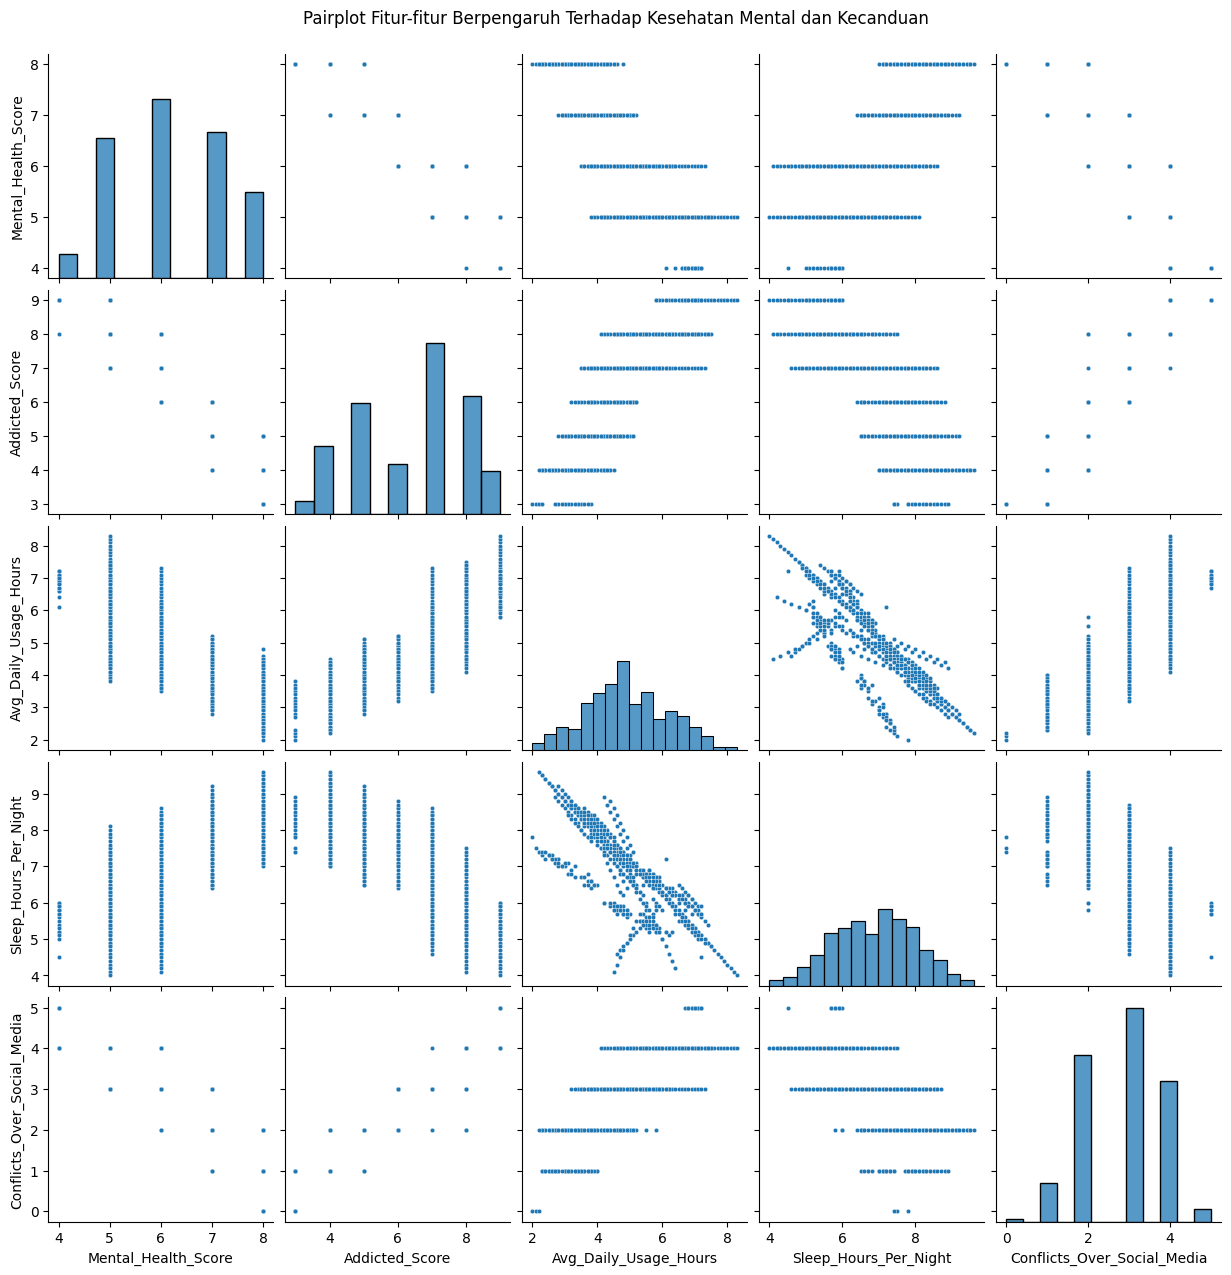

In [23]:
sns.pairplot(addict[['Mental_Health_Score', 'Addicted_Score', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media']], plot_kws={"s": 10})
plt.suptitle("Pairplot Fitur-fitur Berpengaruh Terhadap Kesehatan Mental dan Kecanduan", y=1.02)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = addict.drop(["Addicted_Score"],axis =1)
y = addict["Addicted_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total of sample in dataset: {len(addict)}')
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in dataset: 702
Total of sample in whole dataset: 702
Total of sample in train dataset: 561
Total of sample in test dataset: 141


## Standardization

In [25]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media
166,-0.473558,-0.010295,-0.435592,-1.127634,0.167348
546,-0.473558,1.594007,-0.701980,-1.127634,1.210485
285,0.246404,0.069920,-0.257999,-0.220026,0.167348
362,-0.473558,-0.331155,0.452370,0.687582,0.167348
111,0.246404,0.711641,-0.879572,-0.220026,0.167348


In [26]:
X_train[numerical_features].describe().round(4)

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media
count,561.0000,561.0000,561.0000,561.0000,561.0000
mean,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.9135,-2.3365,-2.5667,-2.0352,-2.9621
25%,-1.1935,-0.6520,-0.7908,-1.1276,-0.8758
50%,0.2464,-0.0905,0.0972,-0.2200,0.1673
75%,0.9664,0.7116,0.7188,0.6876,1.2105
max,2.4063,2.7170,2.4059,1.5952,2.2536


## Modeling

In [27]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RF', 'LR','Boosting'])

### KNN

In [28]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### RF

In [29]:
# Definisikan parameter yang akan diuji (grid parameter) untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 16, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Inisialisasi model Random Forest
rf = RandomForestRegressor(random_state=55, n_jobs=-1)

# Inisialisasi Grid Search
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           cv=3,  # Jumlah fold dalam cross-validation
                           scoring='neg_mean_squared_error', # Metrik evaluasi
                           n_jobs=-1) # Gunakan semua core CPU

# Lakukan Grid Search pada data training
grid_search_rf.fit(X_train, y_train)

# Parameter terbaik yang ditemukan oleh Grid Search
best_params_rf = grid_search_rf.best_params_
print(f"Parameter terbaik untuk Random Forest (Grid Search): {best_params_rf}")

# Model Random Forest terbaik hasil Grid Search
best_rf_model = grid_search_rf.best_estimator_

# Evaluasi model terbaik pada data training
train_mse_best_rf = mean_squared_error(y_pred=best_rf_model.predict(X_train), y_true=y_train)
print(f"Train MSE dengan Random Forest terbaik (Grid Search): {train_mse_best_rf}")

# Simpan hasil train_mse ke dalam DataFrame 'models'
models.loc['train_mse_gridsearch','RF'] = train_mse_best_rf

# Model Random Forest awal Anda (tanpa Grid Search)
RF_awal = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF_awal.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF_awal.predict(X_train), y_true=y_train)

Parameter terbaik untuk Random Forest (Grid Search): {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train MSE dengan Random Forest terbaik (Grid Search): 0.004789304812834221


### LR

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

models.loc['train_mse','LR'] = mean_squared_error(y_pred=lr.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [31]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi

In [32]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','LR', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': best_rf_model, 'LR': lr, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

<ipython-input-32-338c85b0909a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.96636673  0.24640427 -0.4735582   1.68632919  0.96636673 -0.4735582
  1.68632919  0.24640427 -0.4735582  -1.19352066  0.24640427 -0.4735582
 -1.19352066 -0.4735582   0.24640427  0.96636673  0.96636673 -0.4735582
  1.68632919 -1.19352066 -1.19352066 -0.4735582  -0.4735582   0.96636673
  0.24640427 -1.19352066 -0.4735582   1.68632919  1.68632919  0.24640427
  0.24640427 -0.4735582   0.24640427 -0.4735582   0.96636673  2.40629166
 -1.19352066  0.96636673  1.68632919 -1.19352066  0.24640427  0.96636673
  0.24640427  0.24640427 -1.91348313 -1.19352066  0.24640427  0.96636673
  0.96636673  2.40629166  0.24640427  0.24640427 -1.19352066  0.96636673
 -1.19352066  2.40629166 -1.19352066  0.24640427 -0.4735582  -0.4735582
  1.68632919  0.24640427 -1.19352066 -0.4735582  -1.19352066 -0.4735582
  0.24640427 -1.91348313 -1.19352066  0.24640427 

,train,test
KNN,0.002004,0.002476
RF,0.000005,0.000046
LR,0.000071,0.000094
Boosting,0.000083,0.00011


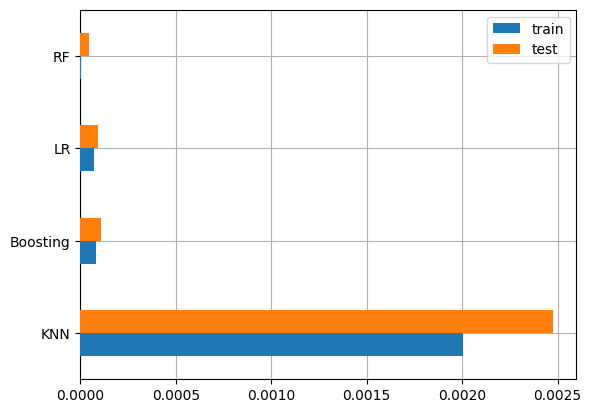

In [33]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

- Model Random Forest menunjukkan performa terbaik dengan nilai MSE test yang paling rendah. Namun, perlu diwaspadai potensi overfitting karena perbedaan yang signifikan antara MSE train dan test.
- Model Linear Regression dan Boosting juga menunjukkan performa yang baik dengan nilai MSE yang rendah dan tidak terlalu jauh berbeda antara data train dan test.
- Model KNN memiliki performa yang paling buruk di antara keempat model ini berdasarkan nilai MSE.

In [34]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_LR,prediksi_Boosting
495,7,5.8,7.0,6.7,7.1


Berdasarkan visualisasi dan contoh prediksi, Model Random Forest memberikan prediksi yang paling akurat, yaitu 7.0, yang sama persis dengan nilai sebenarnya (dibulatkan). Model Boosting juga memberikan prediksi yang cukup dekat, yaitu 7.1. Model Linear Regression memprediksi 6.7, yang juga relatif dekat. Dan Model KNN memberikan prediksi yang paling jauh dari nilai sebenarnya, yaitu 5.8.